<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Project2_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install zarr
!pip install gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.9/203.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import gcsfs
import zarr
import xarray as xr
import glob
import sys
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


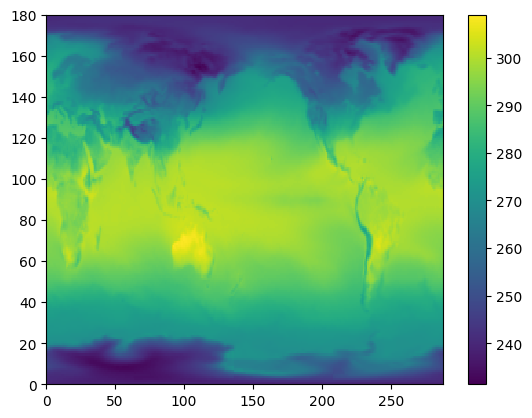

In [4]:
dd = df[(df.experiment_id == 'historical') & (df.institution_id == 'NOAA-GFDL') & (df.table_id == 'Amon') & (df.grid_label=='gr1') & (df.source_id == 'GFDL-ESM4') & (df.member_id == 'r1i1p1f1') & (df.variable_id == 'tas')]
ds = xr.open_zarr(
dd.zstore.iloc[0],
storage_options={'token': 'anon'},
consolidated=True,decode_times=False
)
plt.pcolormesh(ds.tas[-1,:,:]);plt.colorbar()

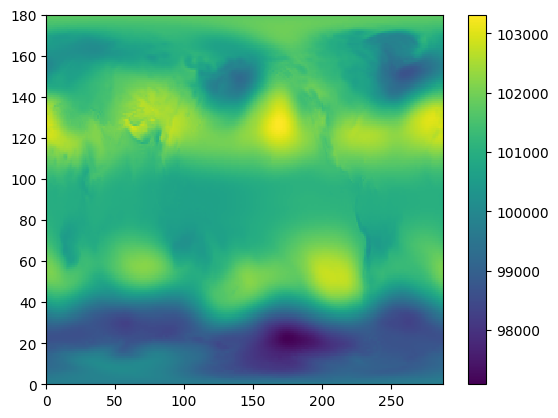

In [7]:
dd = df[(df.experiment_id == 'historical') & (df.institution_id == 'NOAA-GFDL') & (df.table_id == 'Amon') & (df.grid_label=='gr1') & (df.source_id == 'GFDL-ESM4') & (df.member_id == 'r1i1p1f1') & (df.variable_id == 'psl')]
ds2 = xr.open_zarr(
dd.zstore.iloc[0],
storage_options={'token': 'anon'},
consolidated=True,decode_times=False
)
plt.pcolormesh(ds2.psl[-1,:,:]);plt.colorbar()

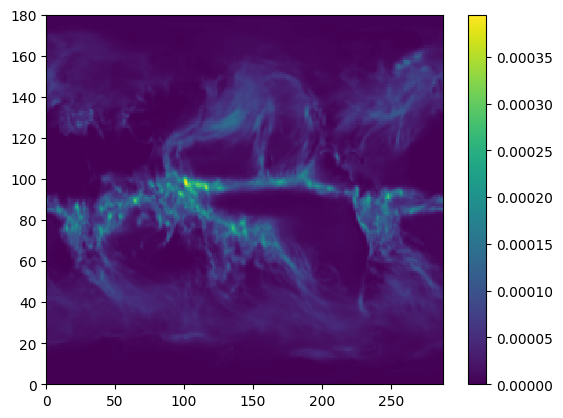

In [8]:
dd = df[(df.experiment_id == 'historical') & (df.institution_id == 'NOAA-GFDL') & (df.table_id == 'Amon') & (df.grid_label=='gr1') & (df.source_id == 'GFDL-ESM4') & (df.member_id == 'r1i1p1f1') & (df.variable_id == 'pr')]
ds3 = xr.open_zarr(
dd.zstore.iloc[0],
storage_options={'token': 'anon'},
consolidated=True,decode_times=False
)
plt.pcolormesh(ds3.pr[-1,:,:]);plt.colorbar()

In [12]:
ds['psl'] = ds2.psl
ds['pr'] = ds3.pr
time = pd.date_range("1850-01-01", freq="M", periods=1980)
ds['time'] = time
ds

<ipython-input-12-4c092c901b05>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range("1850-01-01", freq="M", periods=1980)


<xarray.Dataset> Size: 1GB
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1980)
Coordinates:
  * bnds       (bnds) float64 16B 1.0 2.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) datetime64[ns] 16kB 1850-01-31 1850-02-28 ... 2014-12-31
    height     float64 8B ...
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
    time_bnds  (time, bnds) float64 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 411MB dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
    psl        (time, lat, lon) float32 411MB dask.array<chunksize=(495, 180, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 411MB dask.array<chunksize=(495, 180, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/75e5c5a7-d7c4-4860-beb1-db454f25f13a...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-09-10;created;by nhn2@columbia.edu

In [13]:
ds.to_netcdf('GFDL_ESM4_precip_slp_tas.nc',unlimited_dims='time')

In [14]:
# save it to netcdf
from google.colab import files
files.download('GFDL_ESM4_precip_slp_tas.nc')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>